In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('synthetic_dataset_10000x20.csv')

In [3]:
df.head(3)

,customer_id,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,...,education,marital_status,region,recent_default,has_credit_card,signup_date,signup_dayofweek,debt_to_income,sin_age,target_default_risk
0,CUST006253,30,66737.0,11155.0,2272.0,2,605.076204,26965.0,48,3.9,...,HS,Single,West,1,1,2020-07-05,6,0.404,0.141120,1
1,CUST004685,22,70740.0,997.0,1934.0,1,683.291967,4681.0,36,0.7,...,Bachelors,Married,East,0,0,2018-10-03,2,0.066,0.808496,1
2,CUST001732,68,38890.0,1929.0,1696.0,0,658.003360,12633.0,72,2.2,...,Bachelors,Single,East,0,1,2018-05-30,2,0.325,0.494113,0


In [4]:
df.isnull().sum()

customer_id              0
age                      0
income                 318
savings                311
monthly_expenses       325
num_dependents           0
credit_score           326
loan_amount              0
loan_term_months         0
employment_years         0
home_ownership           0
education                0
marital_status           0
region                   0
recent_default           0
has_credit_card          0
signup_date              0
signup_dayofweek         0
debt_to_income           0
sin_age                  0
target_default_risk      0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.dtypes

customer_id             object
age                      int64
income                 float64
savings                float64
monthly_expenses       float64
num_dependents           int64
credit_score           float64
loan_amount            float64
loan_term_months         int64
employment_years       float64
home_ownership          object
education               object
marital_status          object
region                  object
recent_default           int64
has_credit_card          int64
signup_date             object
signup_dayofweek         int64
debt_to_income         float64
sin_age                float64
target_default_risk      int64
dtype: object

### Ploting distributions of numeric features
#### histplot

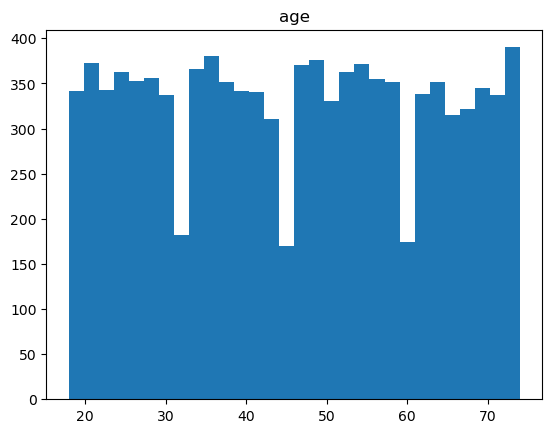

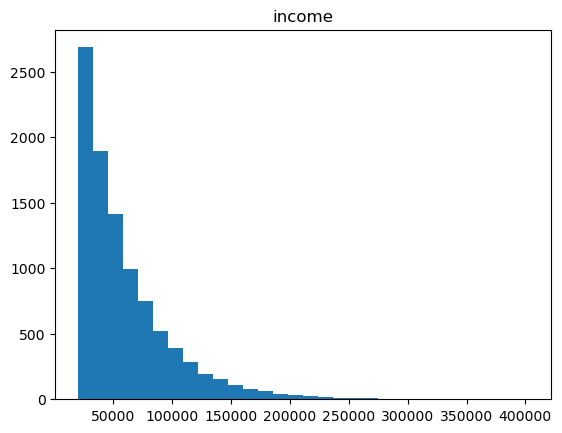

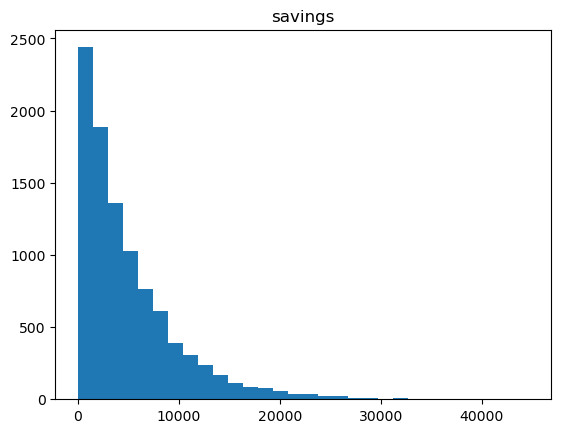

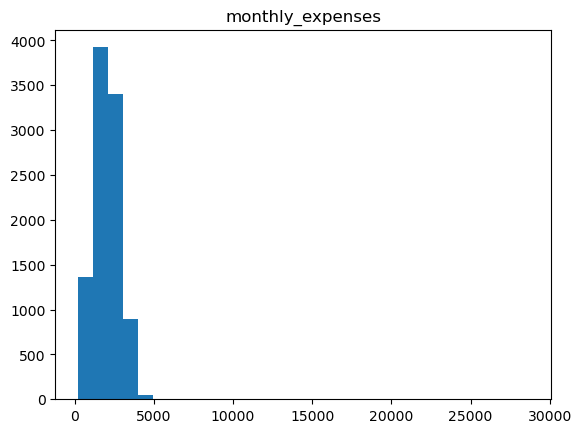

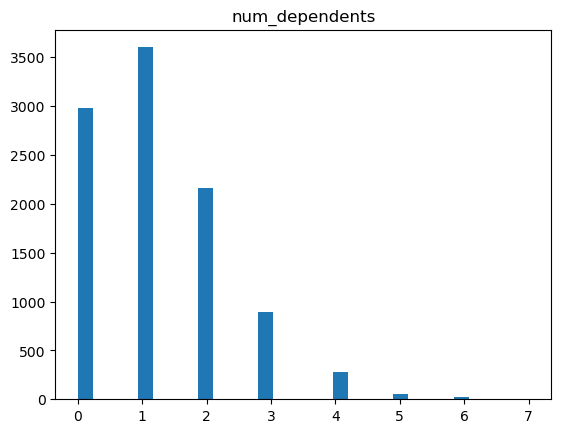

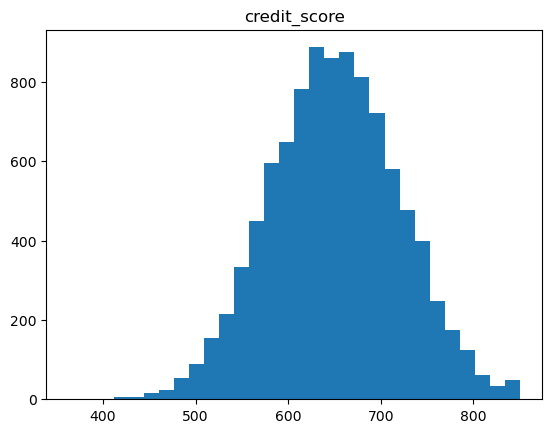

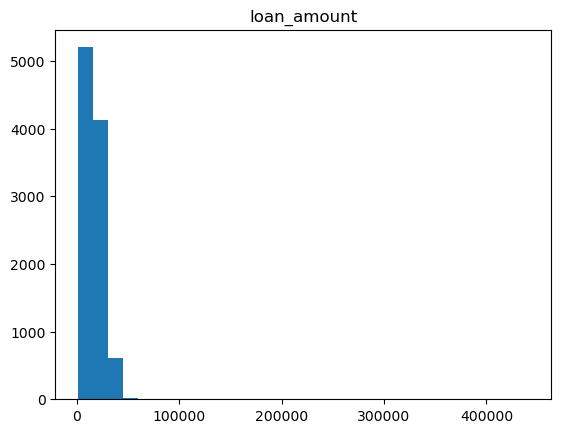

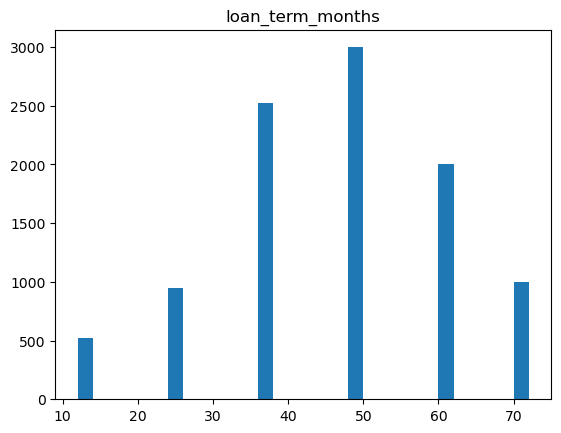

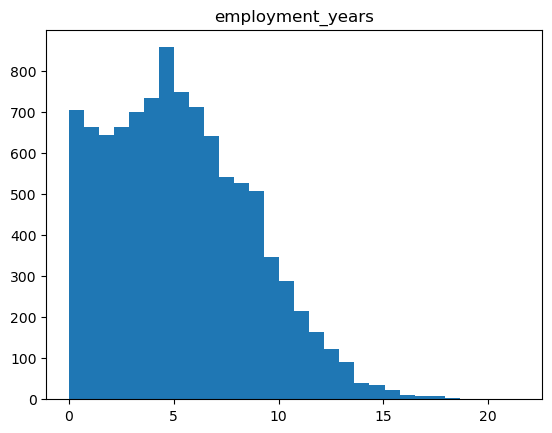

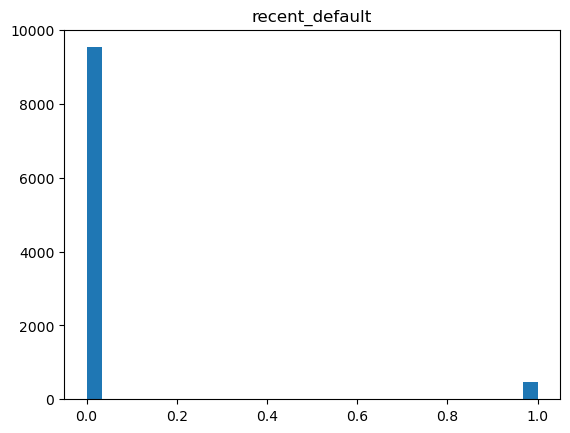

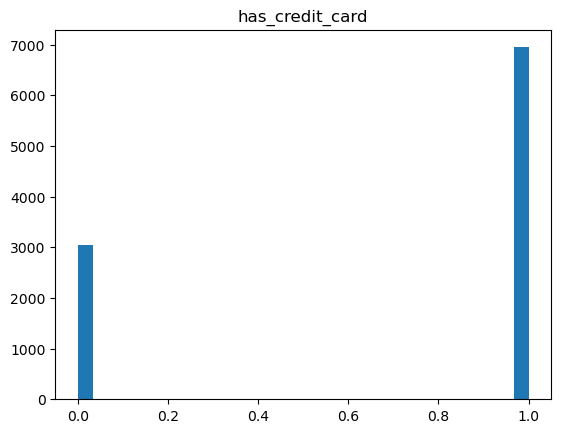

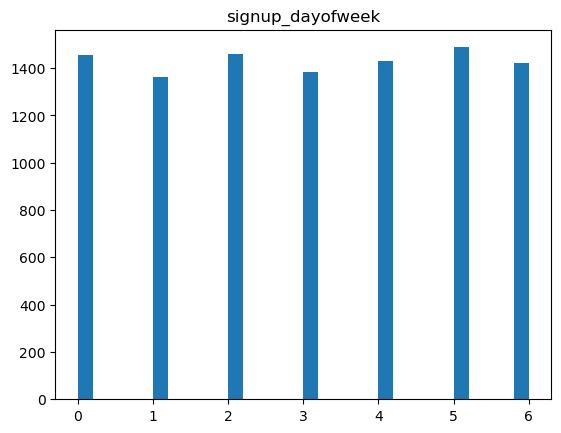

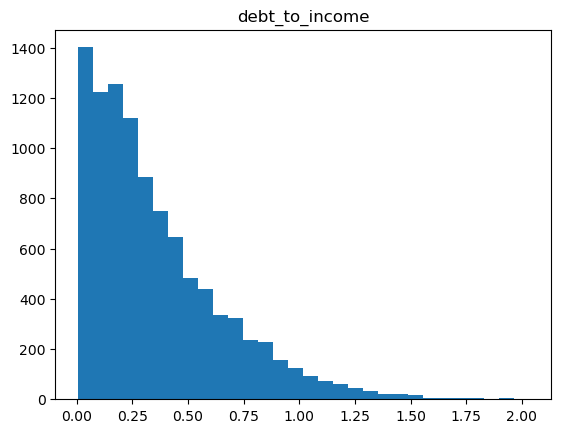

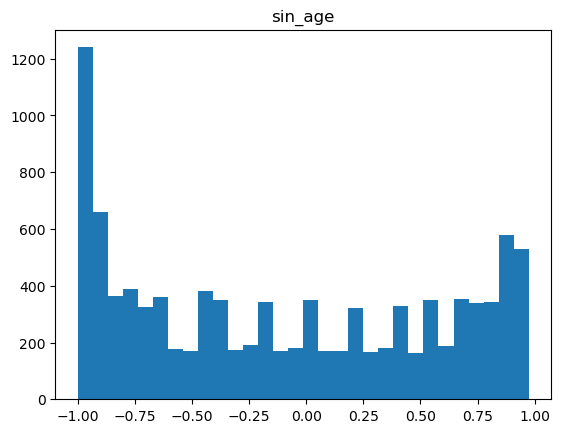

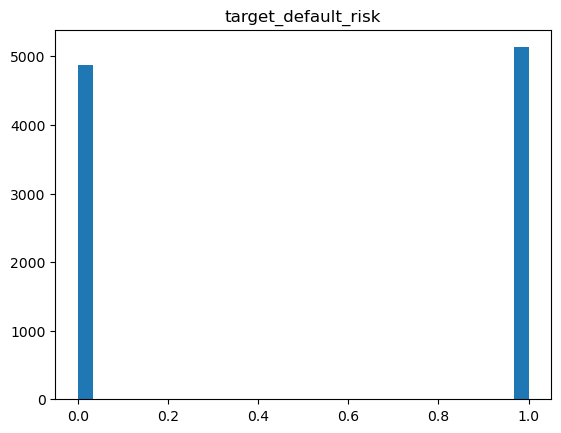

In [7]:
num_cols = df.select_dtypes(include=['int64', 'float64'])

for col in num_cols:
    plt.hist(df[col], bins=30)
    plt.title(col)
    plt.show()


#### CountPlot for Categorical Features

In [8]:
cat_columns=df.select_dtypes(include=['object'])

In [9]:
cat_columns.head(3)

,customer_id,home_ownership,education,marital_status,region,signup_date
0,CUST006253,RENT,HS,Single,West,2020-07-05
1,CUST004685,RENT,Bachelors,Married,East,2018-10-03
2,CUST001732,OWN,Bachelors,Single,East,2018-05-30


In [10]:
cat_columns.drop(columns=['customer_id','signup_date'],axis=1,inplace=True)

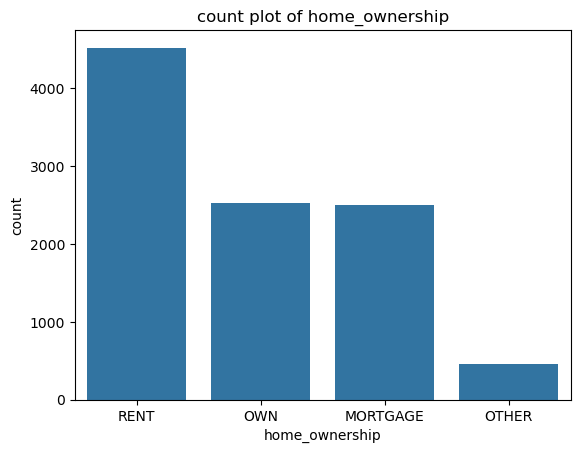

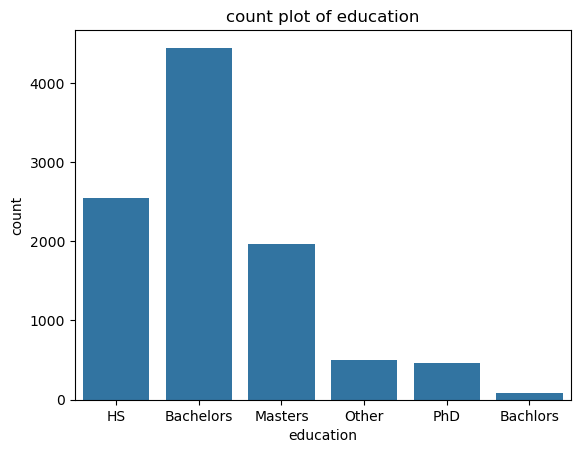

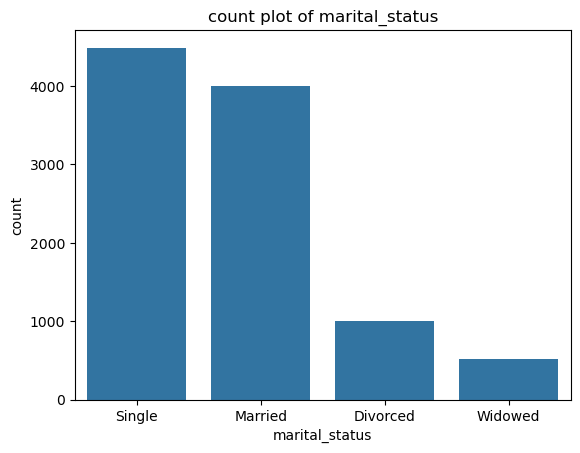

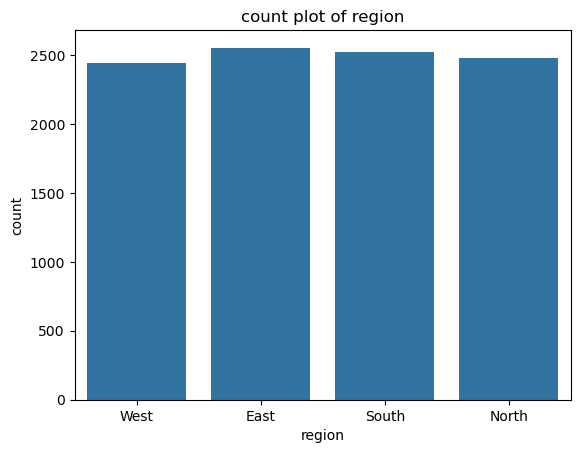

In [11]:
for col in cat_columns:
    sns.countplot(x=col, data=df)
    plt.title(f'count plot of {col}')
    plt.show()

#### checking for impossible values in the dataset that can negatively impact the model

In [12]:
invalid_checks = {
    "Negative Income": (df['income'] < 0).sum(),
    "Negative Savings": (df['savings'] < 0).sum(),
    "Negative Monthly Expenses": (df['monthly_expenses'] < 0).sum(),
    "Invalid Credit Score": ((df['credit_score'] < 300) | (df['credit_score'] > 850)).sum(),
    "Negative Employment Years": (df['employment_years'] < 0).sum()
}
invalid_checks


{'Negative Income': np.int64(0),
 'Negative Savings': np.int64(0),
 'Negative Monthly Expenses': np.int64(0),
 'Invalid Credit Score': np.int64(0),
 'Negative Employment Years': np.int64(0)}

####  Dropping rows with null values from the dataset

In [13]:
df_clean = df.dropna(subset=['income', 'savings','monthly_expenses','credit_score'])


#### Dropping customer_id and signup_date as they contains objects and less likely related with the target column

In [14]:
df_clean.drop(columns=["customer_id","signup_date"],axis=1,inplace=True)

In [15]:
df_clean.isnull().sum()

age                    0
income                 0
savings                0
monthly_expenses       0
num_dependents         0
credit_score           0
loan_amount            0
loan_term_months       0
employment_years       0
home_ownership         0
education              0
marital_status         0
region                 0
recent_default         0
has_credit_card        0
signup_dayofweek       0
debt_to_income         0
sin_age                0
target_default_risk    0
dtype: int64

In [16]:
df_clean.head(3)

,age,income,savings,monthly_expenses,num_dependents,credit_score,loan_amount,loan_term_months,employment_years,home_ownership,education,marital_status,region,recent_default,has_credit_card,signup_dayofweek,debt_to_income,sin_age,target_default_risk
0,30,66737.0,11155.0,2272.0,2,605.076204,26965.0,48,3.9,RENT,HS,Single,West,1,1,6,0.404,0.141120,1
1,22,70740.0,997.0,1934.0,1,683.291967,4681.0,36,0.7,RENT,Bachelors,Married,East,0,0,2,0.066,0.808496,1
2,68,38890.0,1929.0,1696.0,0,658.003360,12633.0,72,2.2,OWN,Bachelors,Single,East,0,1,2,0.325,0.494113,0


#### Visualizing the outliers in each column using boxplot

<Axes: xlabel='savings'>

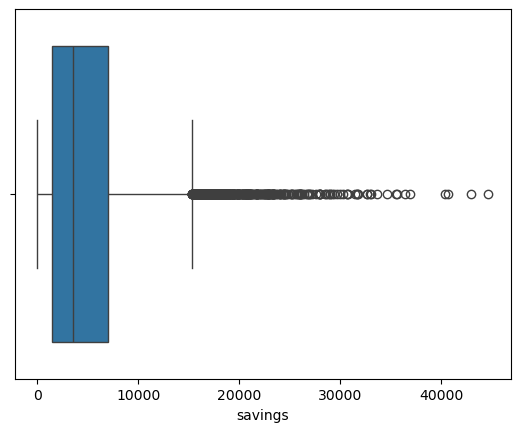

In [17]:
sns.boxplot(data=df_clean,x='savings')

<Axes: xlabel='income'>

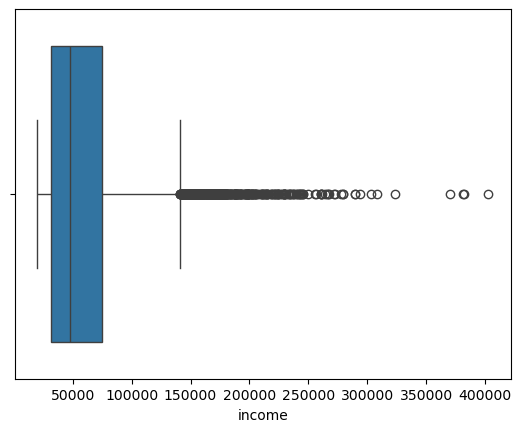

In [18]:
sns.boxplot(data=df_clean,x='income')

<Axes: xlabel='credit_score'>

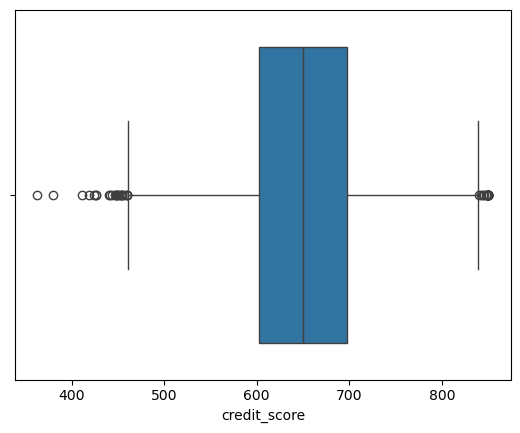

In [19]:
sns.boxplot(data=df_clean,x='credit_score')

<Axes: xlabel='loan_term_months'>

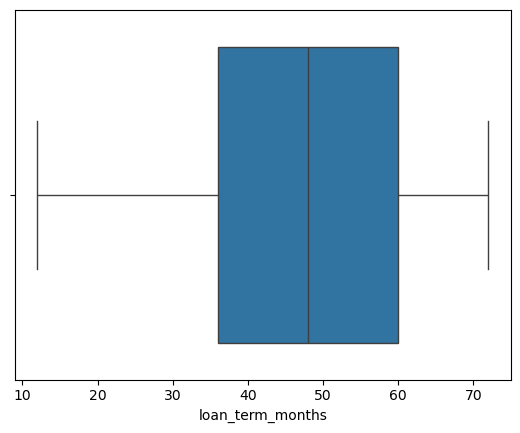

In [20]:
sns.boxplot(data=df_clean,x='loan_term_months')

In [21]:
from sklearn.model_selection import train_test_split
x=df_clean.drop('target_default_risk',axis=1)
y=df_clean.target_default_risk

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [24]:
x_train = x_train.replace('Bachlors', 'Bachelors')
x_test = x_test.replace('Bachlors', 'Bachelors')#--> rectifing typo

In [25]:
transformer=ColumnTransformer(transformers=[ 
    ('tnf1',StandardScaler(),['age', 'income','savings','monthly_expenses','num_dependents', 'credit_score', 'loan_amount', 'loan_term_months','employment_years','debt_to_income', 'sin_age']),
    ('tnf2',OneHotEncoder(sparse_output=False, drop='first'),['home_ownership','marital_status','region']),
    ('tnf3',OrdinalEncoder(categories=[['Other','HS', 'Bachelors', 'Masters', 'PhD']]),['education'])],remainder='passthrough')

In [26]:
x_train_transformed=transformer.fit_transform(x_train)
x_test_transformed=transformer.transform(x_test)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model=LogisticRegression()
model.fit(x_train_transformed,y_train)

LogisticRegression()

In [29]:
y_pred=model.predict(x_test_transformed)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_pred,y_test)

0.9413773477518498

### DecisionTree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
model_1=DecisionTreeClassifier(max_depth=5,min_samples_leaf=10,min_samples_split=20)

##### max_depth=5 --> This parameter will limit the tree depth to 5
##### min_samples_leaf=10--> This parameter specifies that each leaf node must contain at least 10 samples
##### min_samples_split --> This parameter defines the minimum number of samples required to split an internal node.

In [34]:
model_1.fit(x_train_transformed,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=20)

In [35]:
y_pred_2=model_1.predict(x_test_transformed)

In [36]:
accuracy_score(y_test,y_pred_2)

0.9516220830961867

### SVM

In [37]:
from sklearn.svm import SVC

In [38]:
model_3=SVC(kernel='linear')

In [39]:
model_3.fit(x_train_transformed,y_train)

SVC(kernel='linear')

In [40]:
y_pred_3=model_3.predict(x_test_transformed)

In [41]:
accuracy_score(y_test,y_pred_3)

0.9538986909504837

### RandomForest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [300,400,500],
    'max_features':[10,12,14],
    'min_samples_split':[2,3,4,5]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_transformed, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'max_features': 14, 'min_samples_split': 4, 'n_estimators': 300}
Best accuracy: 0.9574377224199289


In [44]:
model_4=RandomForestClassifier(n_estimators=500,max_features=14)

##### n_estimators---> This parameter specifies the number of decision trees in the forest.
##### max_features---> This parameter determines the number of features considered when looking for the best split at each node

In [45]:
model_4.fit(x_train_transformed,y_train)

RandomForestClassifier(max_features=14, n_estimators=500)

In [46]:
y_pred_4=model_4.predict(x_test_transformed)

In [47]:
accuracy_score(y_test,y_pred_4)

0.9573136027319294

In [48]:
from xgboost import XGBClassifier

In [49]:
model_5=XGBClassifier(n_estimators=700,random_state=42)

In [50]:
model_5.fit(x_train_transformed,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=700,
              n_jobs=None, num_parallel_tree=None, ...)

In [51]:
y_pred_5=model_5.predict(x_test_transformed)

In [52]:
accuracy_score(y_pred_5,y_test)

0.9658508821855435

In [53]:
param_grid_2 = {
    'max_depth': [4,5,6,7],
    'min_child_weight': [1,3,5], 
    'n_estimators':[500,600,700]
}

In [54]:
xgb = XGBClassifier(
    learning_rate=0.1,
    eval_metric='logloss',
    random_state=42,
)

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_2, 
    scoring='accuracy',      
    cv=5,
    n_jobs=-1,
)

grid.fit(x_train_transformed, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [500, 600, 700]},
             scoring='accuracy')

In [55]:
print("Best parameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_)


Best parameters: {'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 500}
Best accuracy: 0.9612811387900356


### ANN

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers,models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [71]:
model_early = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(x_train_transformed.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_early.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)
history = model_early.fit(
    x_train_transformed,
    y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/200
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8891 - loss: 0.3171 - val_accuracy: 0.9359 - val_loss: 0.2566
Epoch 2/200
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9352 - loss: 0.2204 - val_accuracy: 0.9445 - val_loss: 0.2424
Epoch 3/200
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9488 - loss: 0.1878 - val_accuracy: 0.9438 - val_loss: 0.2265
Epoch 4/200
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9505 - loss: 0.1656 - val_accuracy: 0.9445 - val_loss: 0.1968
Epoch 5/200
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9578 - loss: 0.1469 - val_accuracy: 0.9452 - val_loss: 0.1923
Epoch 6/200
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9575 - loss: 0.1355 - val_accuracy: 0.9473 - val_loss: 0.1925
Epoch 7/200
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9600 - loss: 0.1299 - val_accuracy: 0.9495 - val_loss: 0.2149
Epoch 8/200
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9658 - loss: 0.1183 - val_accu

In [72]:
test_loss, test_accuracy = model_early.evaluate(
    x_test_transformed,
    y_test,
    verbose=0
)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Test Loss: 0.16440492868423462
Test Accuracy: 0.9487763047218323


In [73]:
y_pred_prob1 = model_early.predict(x_test_transformed)
y_pred_ann1 = (y_pred_prob1 > 0.5).astype(int)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


#### Defining a function to evaluate metrics of all models and to display them as a dataframe

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(name, y_true, y_pred):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred)
    }

### Observations

In [75]:
results = []
results.append(evaluate_model("Logistic Regression", y_test, y_pred))
results.append(evaluate_model("Decision Tree", y_test, y_pred_2))
results.append(evaluate_model("SVM", y_test,y_pred_3))
results.append(evaluate_model("Random Forest", y_test, y_pred_4))
results.append(evaluate_model("XGBoost", y_test, y_pred_5))
results.append(evaluate_model("ANN",y_test,y_pred_ann1))
pd.DataFrame(results)


,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.941377,0.957569,0.926748,0.941906
1,Decision Tree,0.951622,0.953333,0.952275,0.952804
2,SVM,0.953899,0.971264,0.937847,0.954263
3,Random Forest,0.957314,0.961969,0.954495,0.958217
4,XGBoost,0.965851,0.970885,0.962264,0.966555
5,ANN,0.948776,0.959230,0.940067,0.949552
